In [1]:
import itertools
import random
import networkx as nx

In [4]:
# 1. Python's random module
# random.random
p = 0.75

for _ in range(10):
    r = random.random()
    if r < p:
        print('Heads')
    else:
        print('Tails')

Heads
Heads
Heads
Tails
Tails
Heads
Heads
Heads
Tails
Heads


In [5]:
# random.choice
names = ['Ahmed', 'Ali', 'Omar', 'Yzan']
random.choice(names)

'Omar'

In [6]:
# random.sample
G = nx.cycle_graph(5)
random.sample(G.nodes, 2)

C:\Users\Momo\AppData\Local\Temp/ipykernel_8480/1074505313.py:3: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  random.sample(G.nodes, 2)


[4, 2]

In [7]:
# random.choices
names = ['Ahmed', 'Ali', 'Omar']
tickets = [1, 3, 4]

for _ in range(10):
    print(random.choices(names, tickets))

['Omar']
['Omar']
['Ali']
['Omar']
['Omar']
['Ahmed']
['Omar']
['Omar']
['Ahmed']
['Ali']


In [8]:
random.choices(names, tickets, k=10)


['Ali', 'Omar', 'Omar', 'Omar', 'Omar', 'Omar', 'Ali', 'Ali', 'Omar', 'Omar']

In [11]:
# 2. Random Network Model
# Generating combinations
elements = [0, 1, 2, 3, 4, 5]
list(itertools.combinations(elements, 3))

[(0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 1, 5),
 (0, 2, 3),
 (0, 2, 4),
 (0, 2, 5),
 (0, 3, 4),
 (0, 3, 5),
 (0, 4, 5),
 (1, 2, 3),
 (1, 2, 4),
 (1, 2, 5),
 (1, 3, 4),
 (1, 3, 5),
 (1, 4, 5),
 (2, 3, 4),
 (2, 3, 5),
 (2, 4, 5),
 (3, 4, 5)]

In [12]:
G = nx.Graph()
G.add_nodes_from(elements)

list(itertools.combinations(G.nodes, 3))

[(0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 1, 5),
 (0, 2, 3),
 (0, 2, 4),
 (0, 2, 5),
 (0, 3, 4),
 (0, 3, 5),
 (0, 4, 5),
 (1, 2, 3),
 (1, 2, 4),
 (1, 2, 5),
 (1, 3, 4),
 (1, 3, 5),
 (1, 4, 5),
 (2, 3, 4),
 (2, 3, 5),
 (2, 4, 5),
 (3, 4, 5)]

Graph has 16 edges.


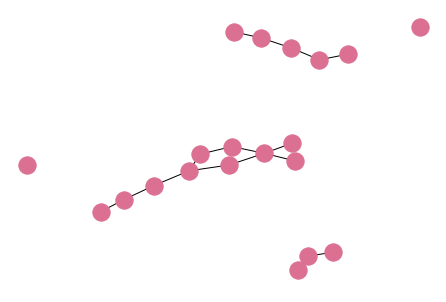

In [20]:
# Gilbert random graph model
def gnp_random_graph(n, p):
    G = nx.Graph()
    G.add_nodes_from(range(n))
    
    for i, j in itertools.combinations(G.nodes, 2):
        r = random.random()
        if r < p:
            G.add_edge(i, j)        
    return G
G = gnp_random_graph(20, 0.12)
nx.draw(G, node_color = 'PaleVioletRed')
print('Graph has', G.number_of_edges(), 'edges.')


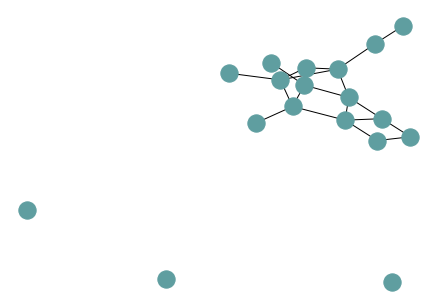

In [22]:
# Erdös-Rényi random graph model
def gnm_random_graph(N, M):
    G = nx.Graph()
    G.add_nodes_from(range(N))
    
    possible_edges = itertools.combinations(G.nodes, 2)
    edges_to_add = random.sample(list(possible_edges), M)
    G.add_edges_from(edges_to_add)
    
    return G
G = gnm_random_graph(18, 20)
nx.draw(G, node_color = 'CadetBlue')


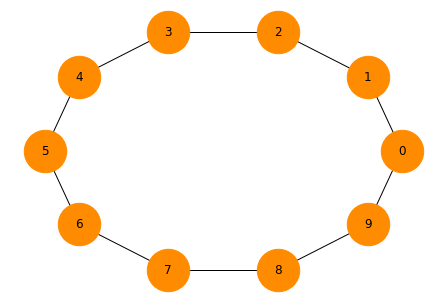

In [36]:
# NetworkX functions
# 3. Small-World Model
# Create a ring of N nodes
n = 10
G = nx.cycle_graph(n)
nx.draw_circular(G, with_labels = True,node_size=1800, node_color = 'DarkOrange')

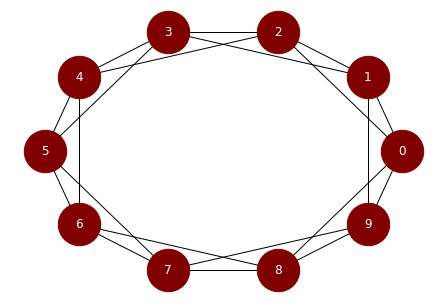

In [37]:
# Connect each node to its K nearest neighbors
k = 4

for no in G.nodes:
    for i in range(1, k // 2 + 1):
        left  = (no-i) % n
        right = (no+i) % n 
        G.add_edge(no, left)
        G.add_edge(no, right)

nx.draw_circular(G, with_labels = True, node_size=1800, node_color = 'maroon',font_color='white')

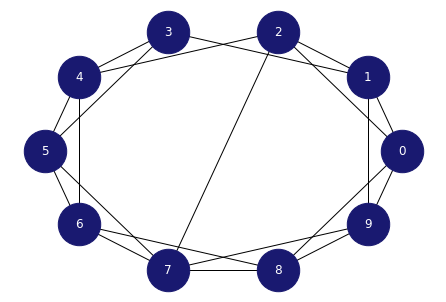

In [38]:
# Rewire some edges
p = 0.1

for u, v in list(G.edges):
    if random.random() < p:
        not_neighbors = set(G.nodes) - set(G.neighbors(u))
        w = random.choice(list(not_neighbors))
        G.remove_edge(u, v)
        G.add_edge(u, w)

nx.draw_circular(G, with_labels = True, node_size=1800, node_color = 'MidnightBlue',font_color='white')

In [31]:
# Watts-Strogatz Small-World Model
def watts_strogatz_graph(N, k, p):
    # 1. Create a ring of N nodes
    G = nx.cycle_graph(N)

    for no in G.nodes:
        for i in range(1, k // 2 + 1):
            left  = (no-i) % n
            right = (no+i) % n 
            G.add_edge(no, left)
            G.add_edge(no, right)
    
    for u, v in list(G.edges):
        if random.random() < p:
            not_neighbors = set(G.nodes) - set(G.neighbors(u)) - {u}
            w = random.choice(list(not_neighbors))
            G.remove_edge(u, v)
            G.add_edge(u, w)

    return G


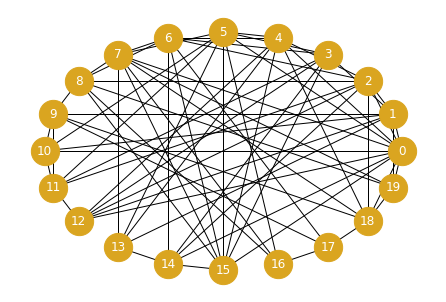

In [41]:
G = watts_strogatz_graph(20, 4, 0.25)
nx.draw_circular(G, with_labels = True, node_size=800, node_color = 'GoldenRod',font_color='white')

[4, 1, 1, 1, 1]


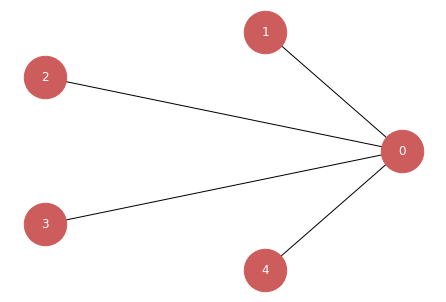

In [49]:
# NetworkX function
# 4. Preferential Attachment Model
G = nx.star_graph(4)
degrees = [G.degree(n) for n in G.nodes]

print(degrees)
nx.draw_circular(G, with_labels = True, node_size=1800, node_color = 'IndianRed',font_color='white')

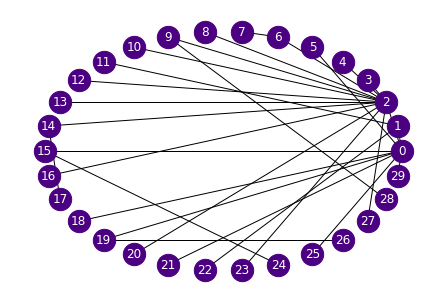

In [57]:
def barabasi_albert_graph(N, m):
    G = nx.complete_graph(m + 1)
    for i in range(G.number_of_nodes(), N):
        new_neighbors = []
        possible_neighbors = list(G.nodes)
        for _ in range(m):
            degrees = [G.degree(n) for n in possible_neighbors]
            j = random.choices(possible_neighbors, degrees)[0]
            new_neighbors.append(j)
            possible_neighbors.remove(j)
        
        for j in new_neighbors:
            G.add_edge(i, j)

    return G
G = barabasi_albert_graph(30, 1)
nx.draw_circular(G, with_labels = True, node_size=500, node_color = 'Indigo',font_color='white')